# Pendahuluan

 Dataset ini berisi informasi tentang sekelompok siswa dan tingkat adaptabilitas mereka terhadap pendidikan online. Adaptabilitas merupakan faktor kunci dalam menilai sejauh mana siswa mampu beradaptasi dengan perubahan dalam metode pembelajaran, khususnya dalam konteks pembelajaran daring.

# Tujuan Analisis
Tujuan dari analisis dataset ini adalah untuk memahami bagaimana faktor-faktor seperti jenis kelamin, usia, tingkat pendidikan, jenis institusi, ketersediaan akses IT, kondisi finansial, dan faktor-faktor lainnya dapat memengaruhi tingkat adaptabilitas siswa terhadap pendidikan online. Dengan informasi ini, kita dapat mengembangkan model prediksi yang dapat memproyeksikan adaptabilitas siswa berdasarkan atribut-atribut tersebut.

# Isi Dataset
Dataset ini mencakup berbagai atribut yang relevan dengan adaptabilitas siswa terhadap pendidikan online.

Beberapa di antaranya termasuk:

- Gender: variabel ini merepresentasikan jenis kelamin siswa
- Age: variabel ini merepresentasikan usia pasien yang diukur dalam rentang tahun
- Education Level: variabel ini merepresentasikan tingkat pendidikan siswa
- Institution Type: variabel ini merepresentasikan jenis institusi pendidikan
- IT Student: variabel ini merepresentasikan apakah siswa memiliki latar belakang IT
- Location in Town: variabel ini merepresentasikan apakah siswa tinggal di daerah perkotaan
- Load-shedding: variabel ini merepresentasikan tingkat pemadaman listrik
- Financial Condition: variabel ini merepresentasikan kondisi finansial siswa
- Internet Type: variabel ini merepresentasikan jenis koneksi internet
- Network Type: variabel ini merepresentasikan jenis jaringan
- Class Duration: variabel ini merepresentasikan durasi kelas dalam jam.
- Self LMS: variabel ini merepresentasikan penggunaan Learning Management System pribadi oleh siswa
- Device: variabel ini merepresentasikan jenis perangkat yang digunakan siswa

Melalui analisis dataset ini, kita berharap dapat mendapatkan wawasan yang lebih dalam tentang faktor-faktor yang mempengaruhi adaptabilitas siswa dalam konteks pendidikan online.

# Objective of Capstone

Tujuan dari Capstone adalah melakukan data preprocessing termasuk Exploratory Data Analysis untuk menggali insight dari data adaptabilitas siswa hingga proses feature selection dan dimensionality reduction. Hasil akhir yang ingin dicapai yaitu mendapatkan insight data adaptabilitas siswa dan data yang siap untuk dimodelkan pada tahap selanjutnya.

# Persiapan

Disini kita akan menyiapkan libraries yang diperlukan dan dataset berdasarkan link: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education. Dalam rangka mengetahui tentang dataset, kita akan melihat overview.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
# URL dataset dan nama kolom
url = "students_adaptability_level_online_education.csv"
column_names = ["Gender", "Age", "Education Level", "Institution Type", "IT Student", "Location",
                "Load-shedding", "Financial Condition", "Internet Type", "Network Type", "Class Duration",
                "Self LMS", "Device", "Adaptivity Level"]

# Membaca data CSV dan menetapkan nama kolom
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
# Menampilkan lima baris terbawah
data.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [7]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(1205, 14)

In [8]:
# Melihat columns apa saja yang ada dalam dataset
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self LMS', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [9]:
# Melihat persebaran data
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [10]:
# Melihat uniqueness data
data.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self LMS               2
Device                 3
Adaptivity Level       3
dtype: int64

In [11]:
# Melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self LMS             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [132]:
# Pelabelan data categorical
data['Gender'] = data['Gender'].replace({1: 'Boy',
                                   0: 'Girl'})
data['Age'] = data['Age'].replace({0: '1-5',
                                  1: '6-10',
                                  2: '11-15',
                                  3: '16-20',
                                  4: '21-25',
                                  5: '26-30'})
data['Education Level'] = data['Education Level'].replace({0: 'School',
                                       1: 'College',
                                       2: 'University'})
data['Institution Type'] = data['Institution Type'].replace({0: 'Non Government',
                                       1: 'Government'})
data['IT Student'] = data['IT Student'].replace({0: 'No',
                                       1: 'Yes'})
data['Location'] = data['Location'].replace({1: 'Yes',
                                   0: 'No'})
data['Load-shedding'] = data['Load-shedding'].replace({0: 'Low',
                                   1: 'High'})
data['Financial Condition'] = data['Financial Condition'].replace({1: 'Poor',
                                     2: 'Mid',
                                     3: 'Rich'})
data['Internet Type'] = data['Internet Type'].replace({1: 'Mobile Data',
                                   2: 'Wifi'})
data['Network Type'] = data['Network Type'].replace({1: '2G',
                                     2: '3G',
                                     3: '4G'})
data['Class Duration'] = data['Class Duration'].replace({0: '0',
                                  1: '1-3',
                                  2: '3-6'})
data['Self LMS'] = data['Self LMS'].replace({0: 'No',
                                       1: 'Yes'})
data['Device'] = data['Device'].replace({1: 'Tab',
                                     2: 'Mobile',
                                     3: 'Computer'})
data['Adaptivity Level'] = data['Adaptivity Level'].replace({0: 'Low',
                                         1: 'Moderate',
                                         2: 'High'})

In [21]:
# Select semua data categorical
categorical_col = data.select_dtypes(exclude=np.number)

In [22]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan informasi: Gender dengan ['Boy' 'Girl']

Berikut ini merupakan informasi: Age dengan ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']

Berikut ini merupakan informasi: Education Level dengan ['University' 'College' 'School']

Berikut ini merupakan informasi: Institution Type dengan ['Non Government' 'Government']

Berikut ini merupakan informasi: IT Student dengan ['No' 'Yes']

Berikut ini merupakan informasi: Location dengan ['Yes' 'No']

Berikut ini merupakan informasi: Load-shedding dengan ['Low' 'High']

Berikut ini merupakan informasi: Financial Condition dengan ['Mid' 'Poor' 'Rich']

Berikut ini merupakan informasi: Internet Type dengan ['Wifi' 'Mobile Data']

Berikut ini merupakan informasi: Network Type dengan ['4G' '3G' '2G']

Berikut ini merupakan informasi: Class Duration dengan ['3-6' '1-3' '0']

Berikut ini merupakan informasi: Self LMS dengan ['No' 'Yes']

Berikut ini merupakan informasi: Device dengan ['Tab' 'Mobile' 'Computer']

Berikut ini merupakan

In [26]:
# Check missing values
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self LMS               0
Device                 0
Adaptivity Level       0
dtype: int64


In [37]:
# Memeriksa duplikat data
data.duplicated().sum()

949

In [38]:
# Menampilkan baris data duplicate
data[data.duplicated()]

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
28,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
29,Girl,16-20,College,Non Government,No,Yes,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
34,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
42,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
43,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [65]:
# Menghapus data duplikat
data.drop_duplicates(keep="first", inplace=True)

# Memeriksa ulang duplikat data
data.duplicated().sum()

0

In [41]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(256, 14)

In [66]:
# Cek data Age
data['Gender'].value_counts()

Boy     148
Girl    108
Name: Gender, dtype: int64

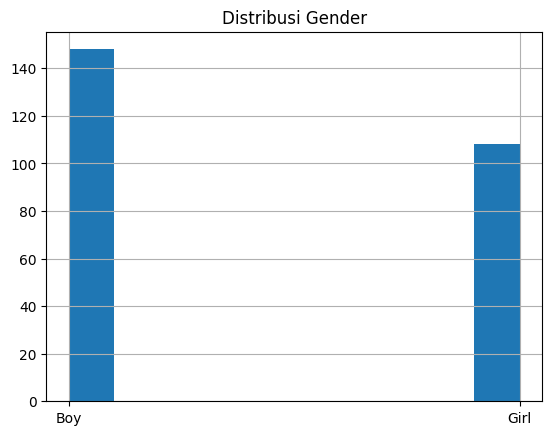

In [67]:
# Jumlah kategori sex pada dataset
data["Gender"].hist().plot(kind='bar')
plt.title('Distribusi Gender')
plt.show()

In [83]:
# Urutan rentang usia dari terkecil
age_order = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Cek data Age
data['Age'].value_counts().reindex(age_order)

1-5        8
6-10      13
11-15     50
16-20     66
21-25    101
26-30     18
Name: Age, dtype: int64

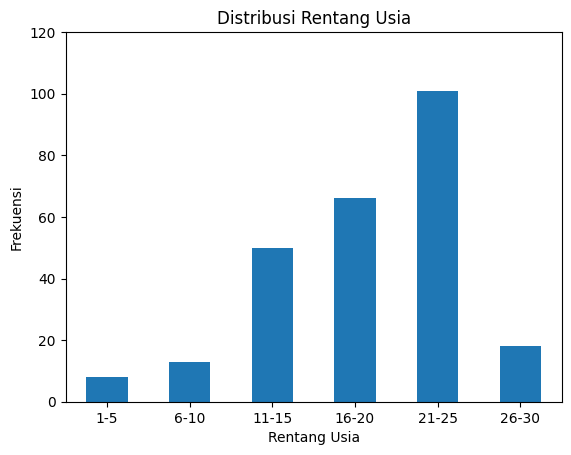

In [84]:
# Menghitung frekuensi masing-masing rentang usia
age_counts = data['Age'].value_counts().reindex(age_order)

# Membuat histogram
age_counts.plot(kind='bar')
plt.title('Distribusi Rentang Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Frekuensi')
plt.ylim(0, 120) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [85]:
# Cek data Education Level
data['Education Level'].value_counts()

University    121
School         82
College        53
Name: Education Level, dtype: int64

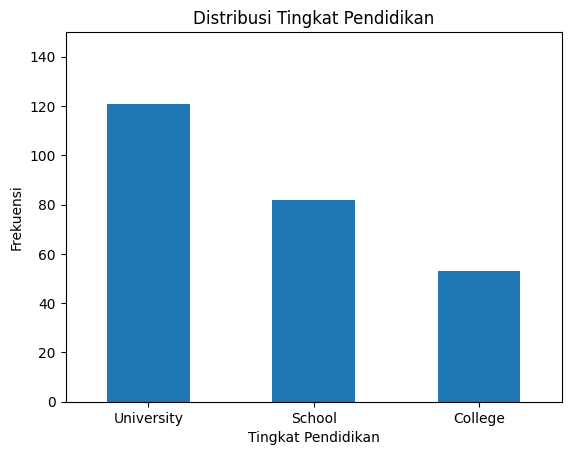

In [71]:
# Menghitung frekuensi masing-masing tingkat pendidikan
education_level_counts = data['Education Level'].value_counts()

# Membuat histogram
education_level_counts.plot(kind='bar')
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Frekuensi')
plt.ylim(0, 150) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [78]:
# Cek data Institution Type
data['Institution Type'].value_counts()

Non Government    152
Government        104
Name: Institution Type, dtype: int64

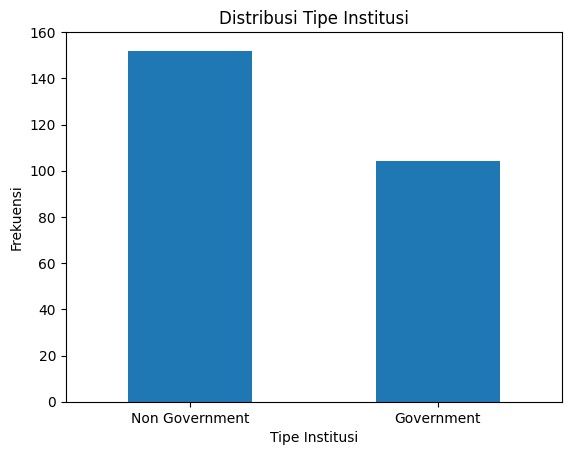

In [73]:
# Menghitung frekuensi masing-masing tipe institusi
institution_type_counts = data['Institution Type'].value_counts()

# Membuat histogram
institution_type_counts.plot(kind='bar')
plt.title('Distribusi Tipe Institusi')
plt.xlabel('Tipe Institusi')
plt.ylabel('Frekuensi')
plt.ylim(0, 160) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [86]:
# Cek data IT Student
data['IT Student'].value_counts()

No     178
Yes     78
Name: IT Student, dtype: int64

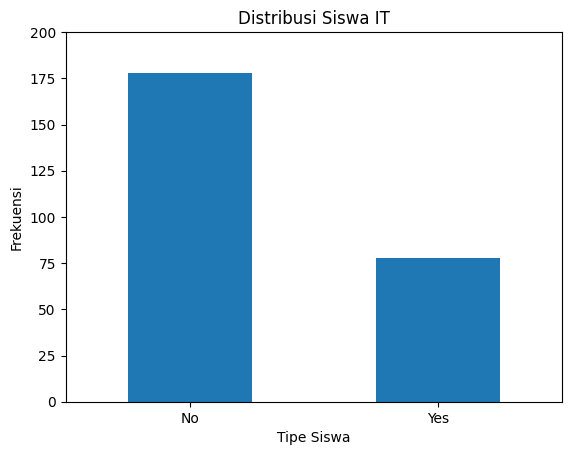

In [80]:
# Menghitung frekuensi apakah siswa IT atau bukan
it_student_counts = data['IT Student'].value_counts()

# Membuat histogram
it_student_counts.plot(kind='bar')
plt.title('Distribusi Siswa IT')
plt.xlabel('Tipe Siswa')
plt.ylabel('Frekuensi')
plt.ylim(0, 200) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [79]:
# Cek data Location
data['Location'].value_counts()

Yes    182
No      74
Name: Location, dtype: int64

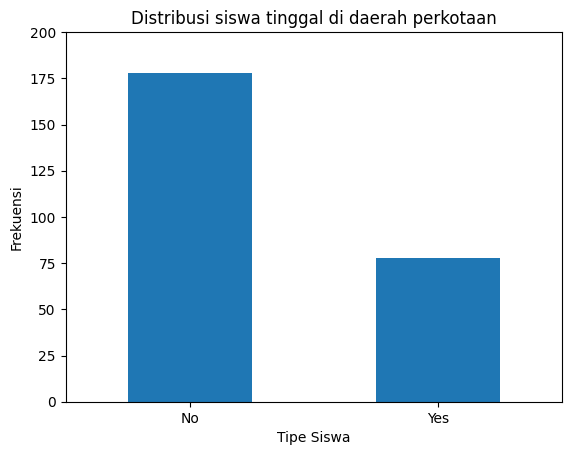

In [81]:
# Menghitung frekuensi apakah siswa IT atau bukan
location_counts = data['Location'].value_counts()

# Membuat histogram
it_student_counts.plot(kind='bar')
plt.title('Distribusi siswa tinggal di daerah perkotaan')
plt.xlabel('Tipe Siswa')
plt.ylabel('Frekuensi')
plt.ylim(0, 200) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [94]:
# Cek data Load-shedding
data['Load-shedding'].value_counts()

Low     202
High     54
Name: Load-shedding, dtype: int64

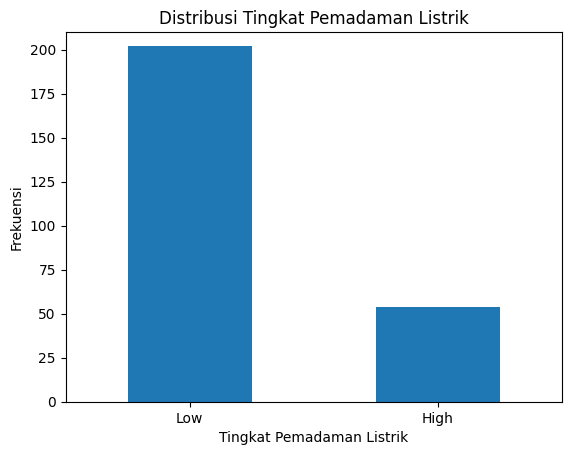

In [96]:
# Menghitung frekuensi tingkat pemadaman listrik
load_shedding_counts = data['Load-shedding'].value_counts()

# Membuat histogram
load_shedding_counts.plot(kind='bar')
plt.title('Distribusi Tingkat Pemadaman Listrik')
plt.xlabel('Tingkat Pemadaman Listrik')
plt.ylabel('Frekuensi')
plt.ylim(0, 210) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [90]:
# Cek data Financial Condition
data['Financial Condition'].value_counts()

Mid     183
Poor     49
Rich     24
Name: Financial Condition, dtype: int64

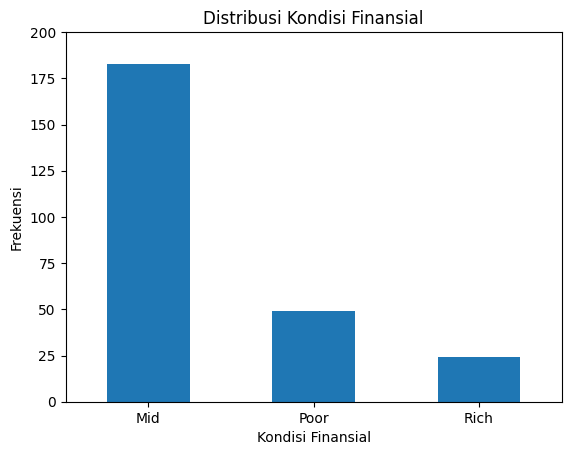

In [93]:
# Menghitung frekuensi kondisi finansial
financial_counts = data['Financial Condition'].value_counts()

# Membuat histogram
financial_counts.plot(kind='bar')
plt.title('Distribusi Kondisi Finansial')
plt.xlabel('Kondisi Finansial')
plt.ylabel('Frekuensi')
plt.ylim(0, 200) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [97]:
# Cek data Internet Type
data['Internet Type'].value_counts()

Mobile Data    138
Wifi           118
Name: Internet Type, dtype: int64

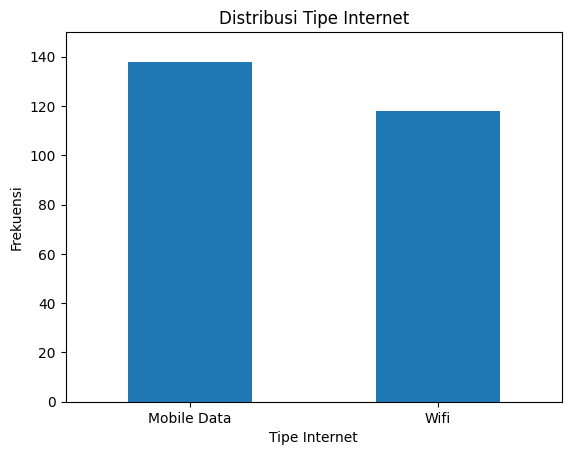

In [98]:
# Menghitung frekuensi tipe internet
internet_counts = data['Internet Type'].value_counts()

# Membuat histogram
internet_counts.plot(kind='bar')
plt.title('Distribusi Tipe Internet')
plt.xlabel('Tipe Internet')
plt.ylabel('Frekuensi')
plt.ylim(0, 150) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [99]:
# Cek data Network Type
data['Network Type'].value_counts()

4G    161
3G     88
2G      7
Name: Network Type, dtype: int64

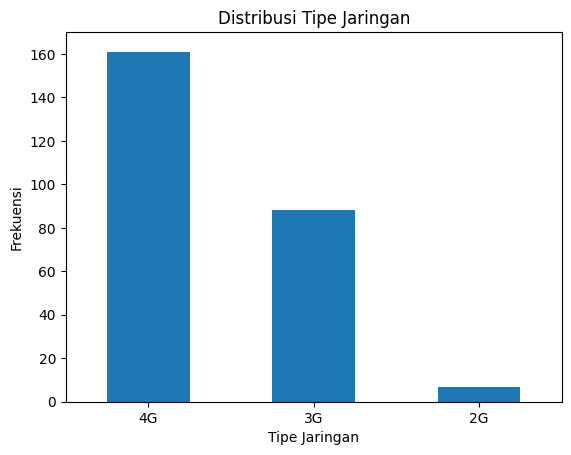

In [101]:
# Menghitung frekuensi tipe jaringan
network_counts = data['Network Type'].value_counts()

# Membuat histogram
network_counts.plot(kind='bar')
plt.title('Distribusi Tipe Jaringan')
plt.xlabel('Tipe Jaringan')
plt.ylabel('Frekuensi')
plt.ylim(0, 170) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [102]:
# Cek data Class Duration
data['Class Duration'].value_counts()

1-3    163
3-6     52
0       41
Name: Class Duration, dtype: int64

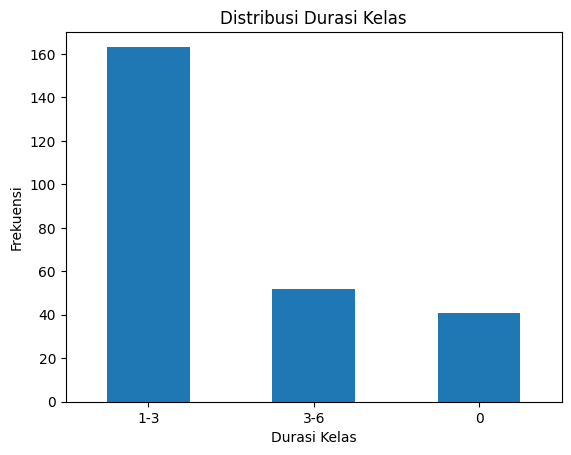

In [103]:
# Menghitung frekuensi durasi kelas
duration_counts = data['Class Duration'].value_counts()

# Membuat histogram
duration_counts.plot(kind='bar')
plt.title('Distribusi Durasi Kelas')
plt.xlabel('Durasi Kelas')
plt.ylabel('Frekuensi')
plt.ylim(0, 170) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [104]:
# Cek data Self LMS
data['Self LMS'].value_counts()

No     198
Yes     58
Name: Self LMS, dtype: int64

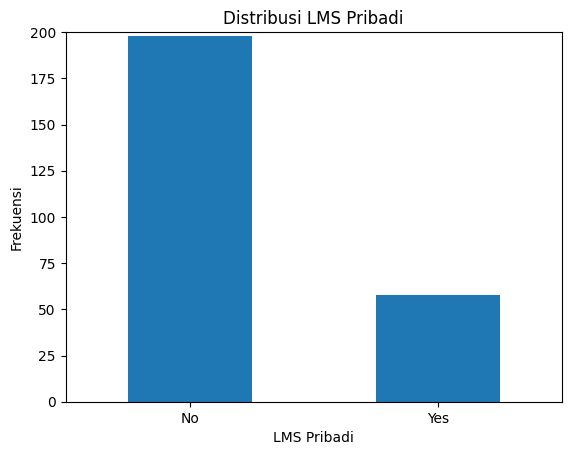

In [106]:
# Menghitung frekuensi penggunaan Learning Management System pribadi oleh siswa
self_lms_counts = data['Self LMS'].value_counts()

# Membuat histogram
self_lms_counts.plot(kind='bar')
plt.title('Distribusi LMS Pribadi')
plt.xlabel('LMS Pribadi')
plt.ylabel('Frekuensi')
plt.ylim(0, 200) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

In [107]:
# Cek data Device
data['Device'].value_counts()

Mobile      207
Computer     43
Tab           6
Name: Device, dtype: int64

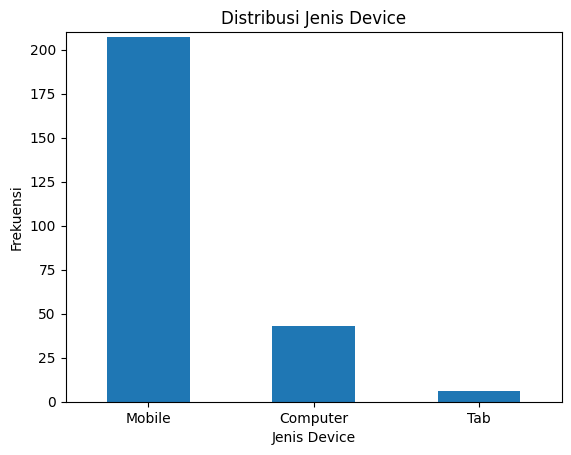

In [108]:
# Menghitung frekuensi jenis device
device_counts = data['Device'].value_counts()

# Membuat histogram
device_counts.plot(kind='bar')
plt.title('Distribusi Jenis Device')
plt.xlabel('Jenis Device')
plt.ylabel('Frekuensi')
plt.ylim(0, 210) # Mengatur rentang sumbu y hingga ratusan
plt.xticks(rotation=0)
plt.show()

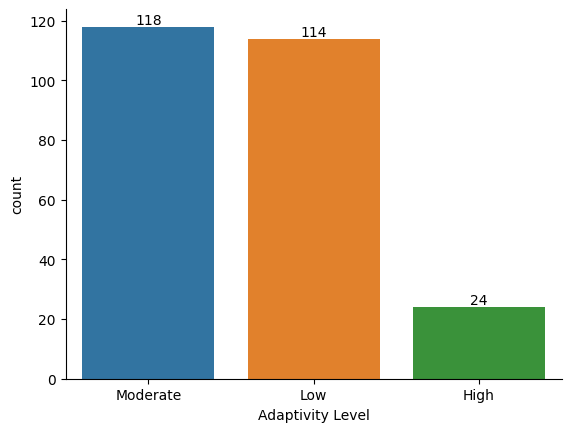

In [110]:
# Memeriksa data imbalance
ax = sns.countplot(data, x="Adaptivity Level")
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

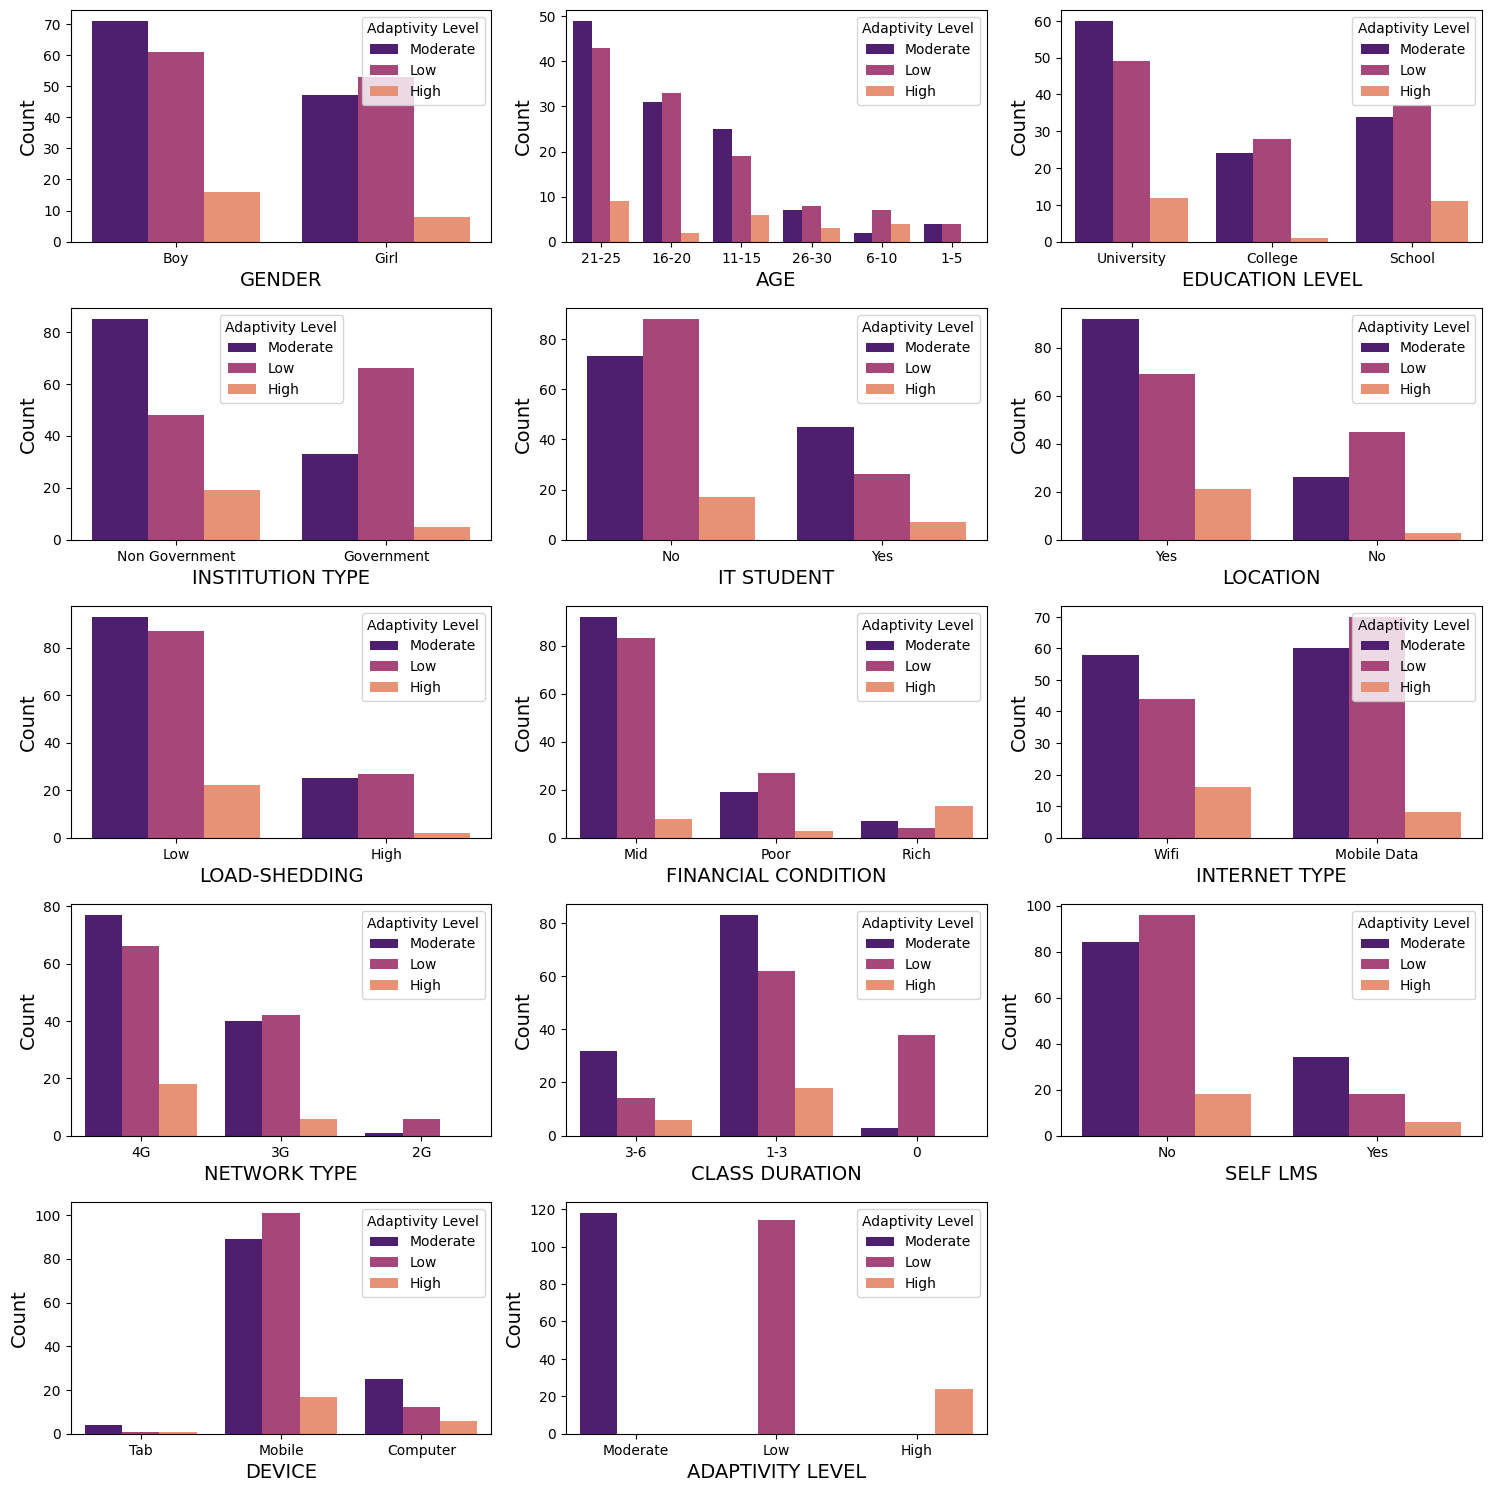

In [113]:
# Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(15,15))
for index, column in enumerate(categorical_col):
    plt.subplot(5, 3, index+1)
    sns.countplot(data=data, x=column, hue='Adaptivity Level', palette='magma')
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("Count", fontsize=14)

plt.tight_layout(pad=1.0)
plt.show()


In [143]:
# Simpan data yang sudah ada label
data.to_csv('data.csv')

# Melabeli kembali datanya
df = pd.read_csv('data.csv', index_col=0)

df['Gender'] = df['Gender'].replace({'Boy': 1,
                                   'Girl': 0})
df['Age'] = df['Age'].replace({'1-5': 0,
                                '6-10': 1,
                                '11-15': 2,
                                '16-20': 3,
                                '21-25': 4,
                                '26-30': 5})
df['Education Level'] = df['Education Level'].replace({'School': 0,
                                       'College': 1,
                                       'University': 2})
df['Institution Type'] = df['Institution Type'].replace({'Non Government': 0,
                                       'Government': 1})
df['IT Student'] = df['IT Student'].replace({'No': 0,
                                       'Yes': 1})
df['Location'] = df['Location'].replace({'Yes': 1,
                                   'No': 0})
df['Load-shedding'] = df['Load-shedding'].replace({'Low': 0,
                                   'High': 1})
df['Financial Condition'] = df['Financial Condition'].replace({'Poor': 1,
                                     'Mid': 2,
                                     'Rich': 3})
df['Internet Type'] = df['Internet Type'].replace({'Mobile Data': 1,
                                   'Wifi': 2})
df['Network Type'] = df['Network Type'].replace({'2G': 1,
                                     '3G': 2,
                                     '4G': 3})
df['Class Duration'] = df['Class Duration'].replace({'0': 0,
                                  '1-3': 1,
                                  '3-6': 2})
df['Self LMS'] = df['Self LMS'].replace({'No': 0,
                                       'Yes': 1})
df['Device'] = df['Device'].replace({'Tab': 1,
                                     'Mobile': 2,
                                     'Computer': 3})
df['Adaptivity Level'] = df['Adaptivity Level'].replace({'Low': 0,
                                         'Moderate': 1,
                                         'High': 2})

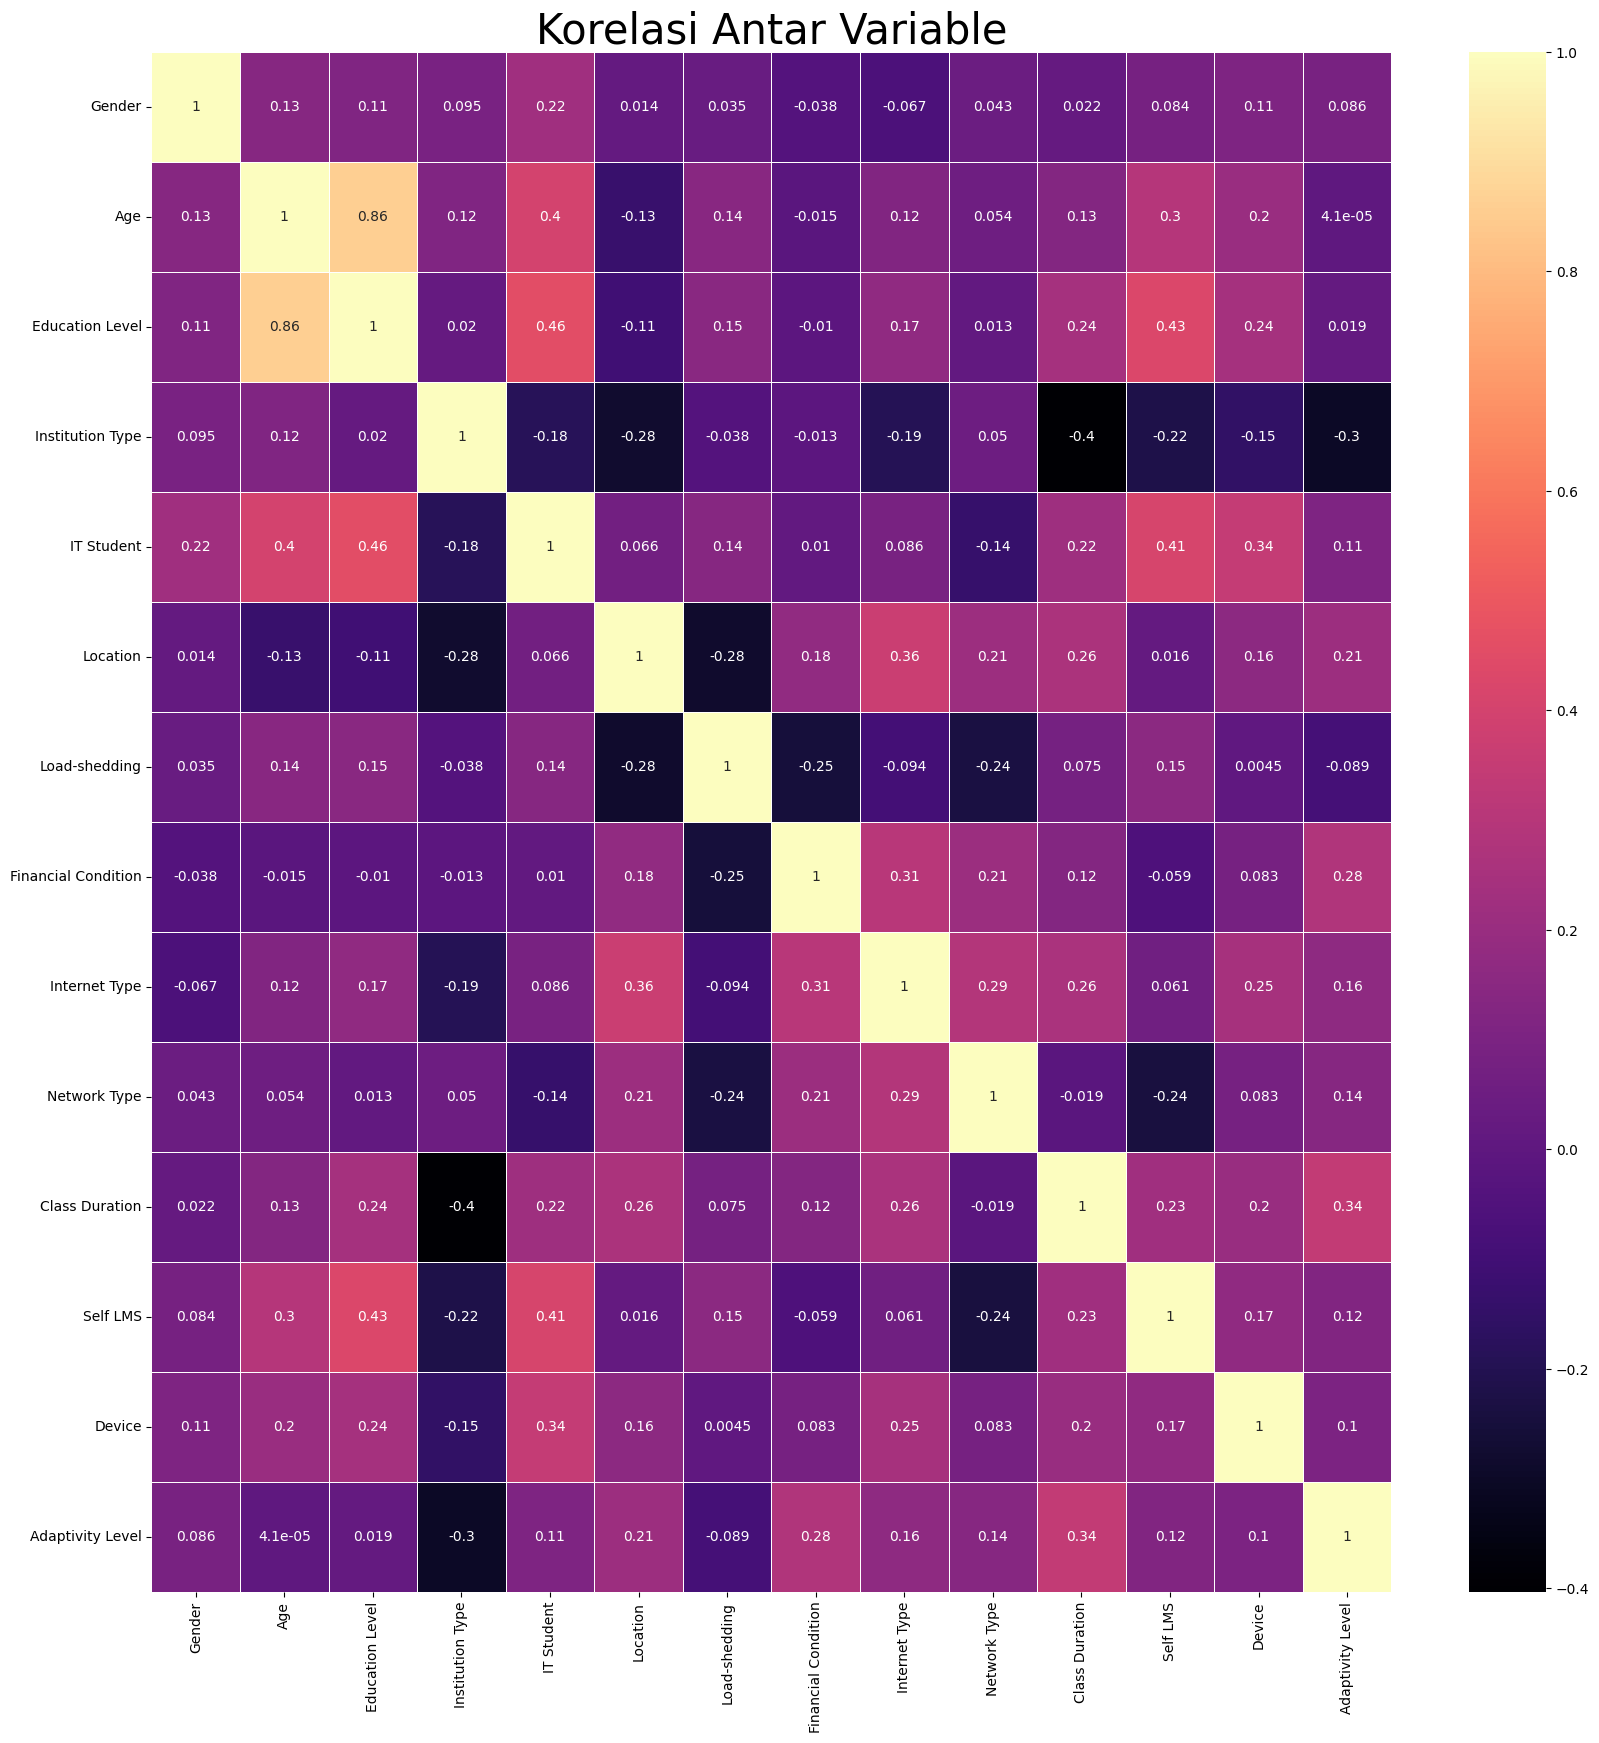

In [144]:
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [145]:
# Menampilkan tabel korelasi
cor_matrix = df.corr()
cor_matrix

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
Gender,1.000000,0.134261,0.112268,0.094616,0.221789,0.013631,0.034534,-0.038372,-0.066942,0.043279,0.021585,0.084438,0.107445,0.086282
Age,0.134261,1.000000,0.860839,0.116826,0.402039,-0.129074,0.142517,-0.015372,0.121730,0.054483,0.126043,0.295778,0.201866,0.000041
Education Level,0.112268,0.860839,1.000000,0.019547,0.455769,-0.105349,0.150311,-0.010104,0.169915,0.012630,0.239384,0.427182,0.241120,0.018726
Institution Type,0.094616,0.116826,0.019547,1.000000,-0.184680,-0.279621,-0.037772,-0.012783,-0.190473,0.050391,-0.403089,-0.219688,-0.154690,-0.301544
IT Student,0.221789,0.402039,0.455769,-0.184680,1.000000,0.066401,0.136190,0.009977,0.085926,-0.139557,0.220901,0.412129,0.343768,0.110888
Location,0.013631,-0.129074,-0.105349,-0.279621,0.066401,1.000000,-0.282824,0.176827,0.364908,0.214652,0.260567,0.015760,0.160580,0.213686
Load-shedding,0.034534,0.142517,0.150311,-0.037772,0.136190,-0.282824,1.000000,-0.250342,-0.093940,-0.237963,0.074530,0.154749,0.004529,-0.089359
Financial Condition,-0.038372,-0.015372,-0.010104,-0.012783,0.009977,0.176827,-0.250342,1.000000,0.306348,0.206242,0.124681,-0.059295,0.083125,0.279479
Internet Type,-0.066942,0.121730,0.169915,-0.190473,0.085926,0.364908,-0.093940,0.306348,1.000000,0.289095,0.259780,0.061133,0.245668,0.163939
Network Type,0.043279,0.054483,0.012630,0.050391,-0.139557,0.214652,-0.237963,0.206242,0.289095,1.000000,-0.019367,-0.238906,0.082681,0.135608


In [146]:
# Mengurutkan korelasi berdasarkan kolom 'Adaptivity Level'
sorted_correlation = cor_matrix['Adaptivity Level'].sort_values(ascending=False)

print("Korelasi dengan Adaptivity Level:")
print(sorted_correlation)


Korelasi dengan Adaptivity Level:
Adaptivity Level       1.000000
Class Duration         0.341394
Financial Condition    0.279479
Location               0.213686
Internet Type          0.163939
Network Type           0.135608
Self LMS               0.121473
IT Student             0.110888
Device                 0.102847
Gender                 0.086282
Education Level        0.018726
Age                    0.000041
Load-shedding         -0.089359
Institution Type      -0.301544
Name: Adaptivity Level, dtype: float64


# Berikut adalah beberapa kesimpulan yang dapat diambil:

Variabel "Class Duration" memiliki korelasi positif yang cukup kuat dengan "Adaptivity Level" (0.341). Artinya, semakin lama durasi kelas, semakin tinggi kemungkinan tingkat adaptasi yang lebih baik.

Variabel "Financial Condition" juga memiliki korelasi positif dengan "Adaptivity Level" (0.279). Ini menunjukkan bahwa mahasiswa dengan kondisi finansial yang lebih baik cenderung memiliki tingkat adaptasi yang lebih tinggi.

Variabel "Location" memiliki korelasi positif yang moderat dengan "Adaptivity Level" (0.214). Ini bisa menunjukkan bahwa mahasiswa yang tinggal di lokasi tertentu mungkin memiliki tingkat adaptasi yang lebih tinggi.

Variabel "Internet Type" dan "Network Type" juga memiliki korelasi positif yang moderat dengan "Adaptivity Level" (0.164 dan 0.136). Ini menunjukkan bahwa jenis dan kualitas koneksi internet dapat mempengaruhi tingkat adaptasi.

Variabel "Self LMS" (penggunaan platform belajar mandiri) memiliki korelasi positif lemah dengan "Adaptivity Level" (0.121). Ini menunjukkan bahwa penggunaan platform belajar mandiri dapat sedikit berkontribusi pada tingkat adaptasi.

Variabel "IT Student" (mahasiswa IT) memiliki korelasi positif lemah dengan "Adaptivity Level" (0.111). Ini mungkin menunjukkan bahwa mahasiswa IT memiliki tingkat adaptasi yang sedikit lebih tinggi.

Variabel "Device" (jenis perangkat yang digunakan) memiliki korelasi positif lemah dengan "Adaptivity Level" (0.103). Jenis perangkat yang digunakan mungkin memiliki pengaruh kecil terhadap adaptasi.

Variabel "Gender", "Education Level", dan "Age" memiliki korelasi positif yang sangat rendah dengan "Adaptivity Level". Hal ini menunjukkan bahwa variabel-variabel ini mungkin memiliki dampak yang lebih kecil terhadap tingkat adaptasi.

Variabel "Load-shedding" (pemadaman listrik) memiliki korelasi negatif yang lemah dengan "Adaptivity Level" (-0.089). Ini menunjukkan bahwa pemadaman listrik dapat sedikit berdampak negatif pada tingkat adaptasi.

Variabel "Institution Type" memiliki korelasi negatif yang lebih kuat dengan "Adaptivity Level" (-0.302). Ini mungkin menunjukkan bahwa tipe institusi (pemerintah/non-pemerintah) memiliki pengaruh signifikan terhadap tingkat adaptasi.

Fitur-fitur ini mungkin memiliki dampak yang lebih besar terhadap tingkat adaptasi. Berikut adalah beberapa fitur yang dapat Anda pertimbangkan untuk dianalisis lebih lanjut:

Class Duration: Fitur ini memiliki korelasi positif yang cukup kuat (0.341) dengan "Adaptivity Level". Anda dapat menganalisis bagaimana durasi kelas yang lebih lama mempengaruhi tingkat adaptasi siswa.

Financial Condition: Fitur ini memiliki korelasi positif (0.279) dengan "Adaptivity Level". Anda dapat menganalisis lebih lanjut bagaimana kondisi finansial mempengaruhi tingkat adaptasi siswa.

Location: Fitur ini memiliki korelasi positif (0.214) dengan "Adaptivity Level". Anda dapat menyelidiki bagaimana lokasi tempat tinggal siswa berkontribusi terhadap adaptasi.

Internet Type dan Network Type: Kedua fitur ini memiliki korelasi positif (0.164 dan 0.136) dengan "Adaptivity Level". Anda bisa melihat bagaimana jenis dan kualitas koneksi internet berpengaruh pada tingkat adaptasi.

Load-shedding: Fitur ini memiliki korelasi negatif (-0.089) dengan "Adaptivity Level". Anda dapat menganalisis dampak pemadaman listrik pada tingkat adaptasi.

Institution Type: Fitur ini memiliki korelasi negatif yang kuat (-0.302) dengan "Adaptivity Level". Anda dapat menyelidiki bagaimana jenis institusi tempat siswa belajar mempengaruhi adaptasi.

In [151]:
# Memasukkan 7 variabel terpilih untuk dianalisa lebih lanjut
variabel = ["Institution Type",  "Location",
                "Load-shedding", "Financial Condition", "Internet Type", "Network Type", "Class Duration"
                ]
analyze = df[variabel]

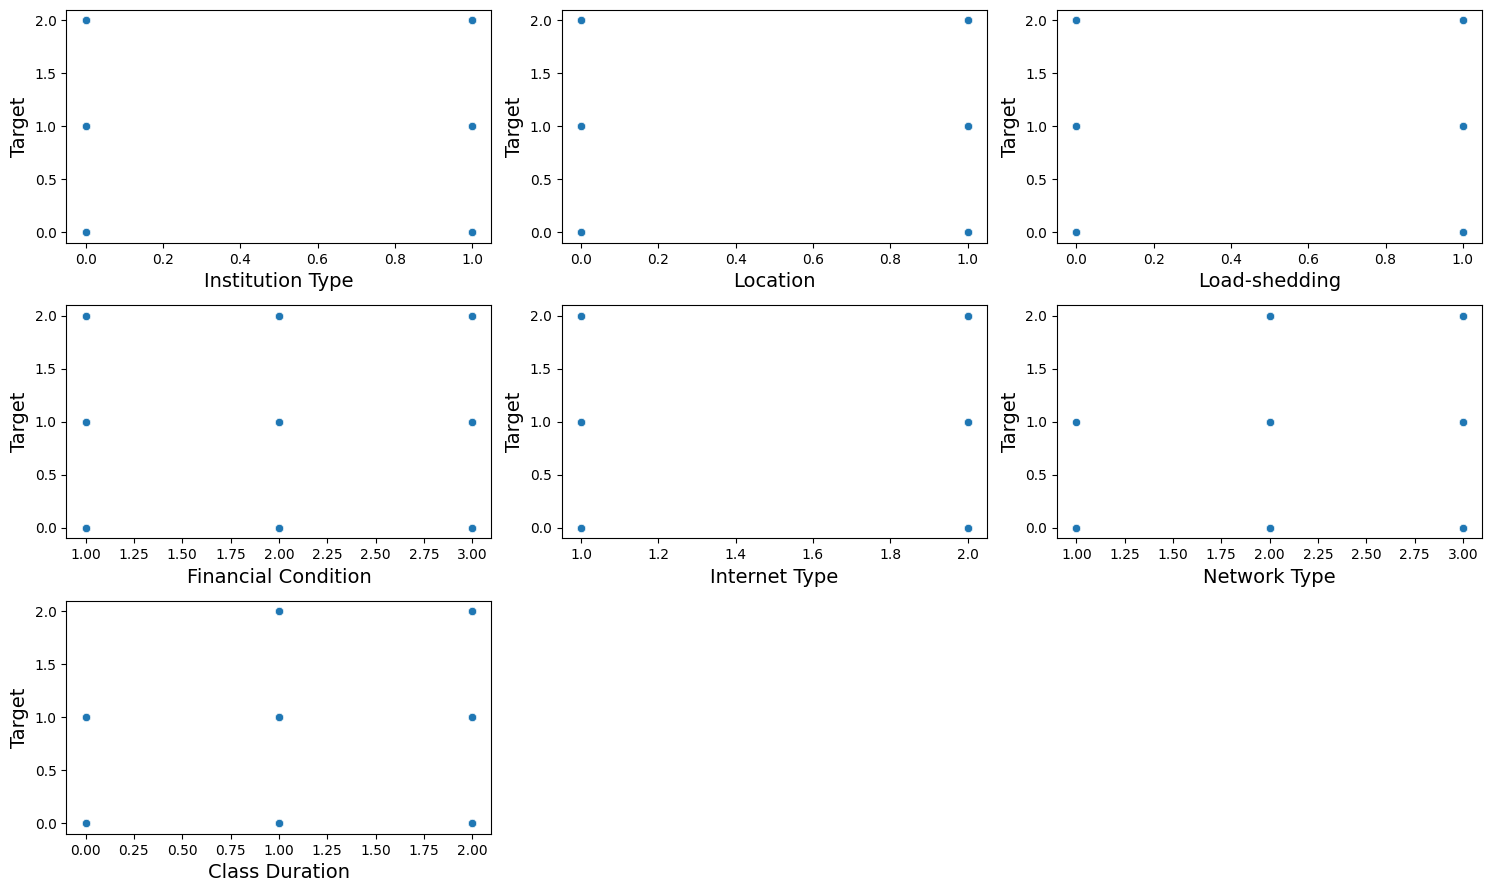

In [153]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df['Adaptivity Level'],data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

In [155]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("Adaptivity Level", axis=1))

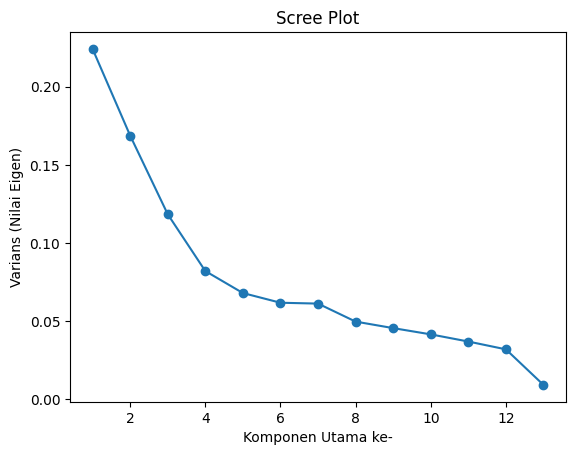

In [156]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [157]:
pca = PCA(n_components=7)
heart_data_reduced = pca.fit_transform(X_scaled)

In [158]:
feature_names = df.drop('Adaptivity Level', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['Education Level', 'Age', 'IT Student', 'Self LMS', 'Device', 'Class Duration', 'Internet Type']
PC2: ['Load-shedding', 'Institution Type', 'Age', 'Education Level', 'Self LMS', 'Gender', 'IT Student']
PC3: ['Class Duration', 'Load-shedding', 'Self LMS', 'Location', 'IT Student', 'Device', 'Internet Type']
PC4: ['Internet Type', 'Education Level', 'Age', 'Load-shedding', 'Financial Condition', 'Class Duration', 'Self LMS']
PC5: ['Load-shedding', 'Network Type', 'Internet Type', 'Device', 'Gender', 'Class Duration', 'Age']
PC6: ['Class Duration', 'Gender', 'Location', 'Education Level', 'Network Type', 'Age', 'Self LMS']
PC7: ['Location', 'Network Type', 'Age', 'Self LMS', 'Education Level', 'Device', 'IT Student']
